In [8]:
# pip install Omnipath scanpy anndata decoupler Omnipath 


In [2]:
import numpy as np
import pandas as pd
import scipy
import anndata as ad
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import decoupler as dc

In [3]:
adata= ad.read_h5ad('/kaggle/input/scanpy2/outs/adata.h5ad')


In [4]:
adata

AnnData object with n_obs × n_vars = 53513 × 23081
    obs: 'CellLine', 'Pool', 'Indication', 'Genes_expressed', 'Discrete_cluster_minpts5_eps1.8', 'Discrete_cluster_minpts5_eps1.5', 'Discrete_cluster_minpts5_eps1.2', 'CNA_subclone', 'SkinPig_score', 'EMTI_score', 'EMTII_score', 'EMTIII_score', 'IFNResp_score', 'p53Sen_score', 'EpiSen_score', 'StressResp_score', 'ProtMatu_score', 'ProtDegra_score', 'G1/S_score', 'G2/M_score', 'n_genes', 'leiden'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Indication_colors', 'hvg', 'leiden', 'log1p', 'neighbors', 'pca', 'tsne', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [5]:
for i in adata.var_names:
    if 'VEGF' in i :
        print(i)

VEGFA
VEGFB
VEGFC


In [6]:
adata.layers['counts'] = adata.X.copy()
adata.layers['log2_counts'] = scipy.sparse.csr_matrix(np.log2(adata.layers['counts'].toarray()+1))

/tmp/ipykernel_36/3140106508.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)  # Show x-axis labels only for the bottom plot


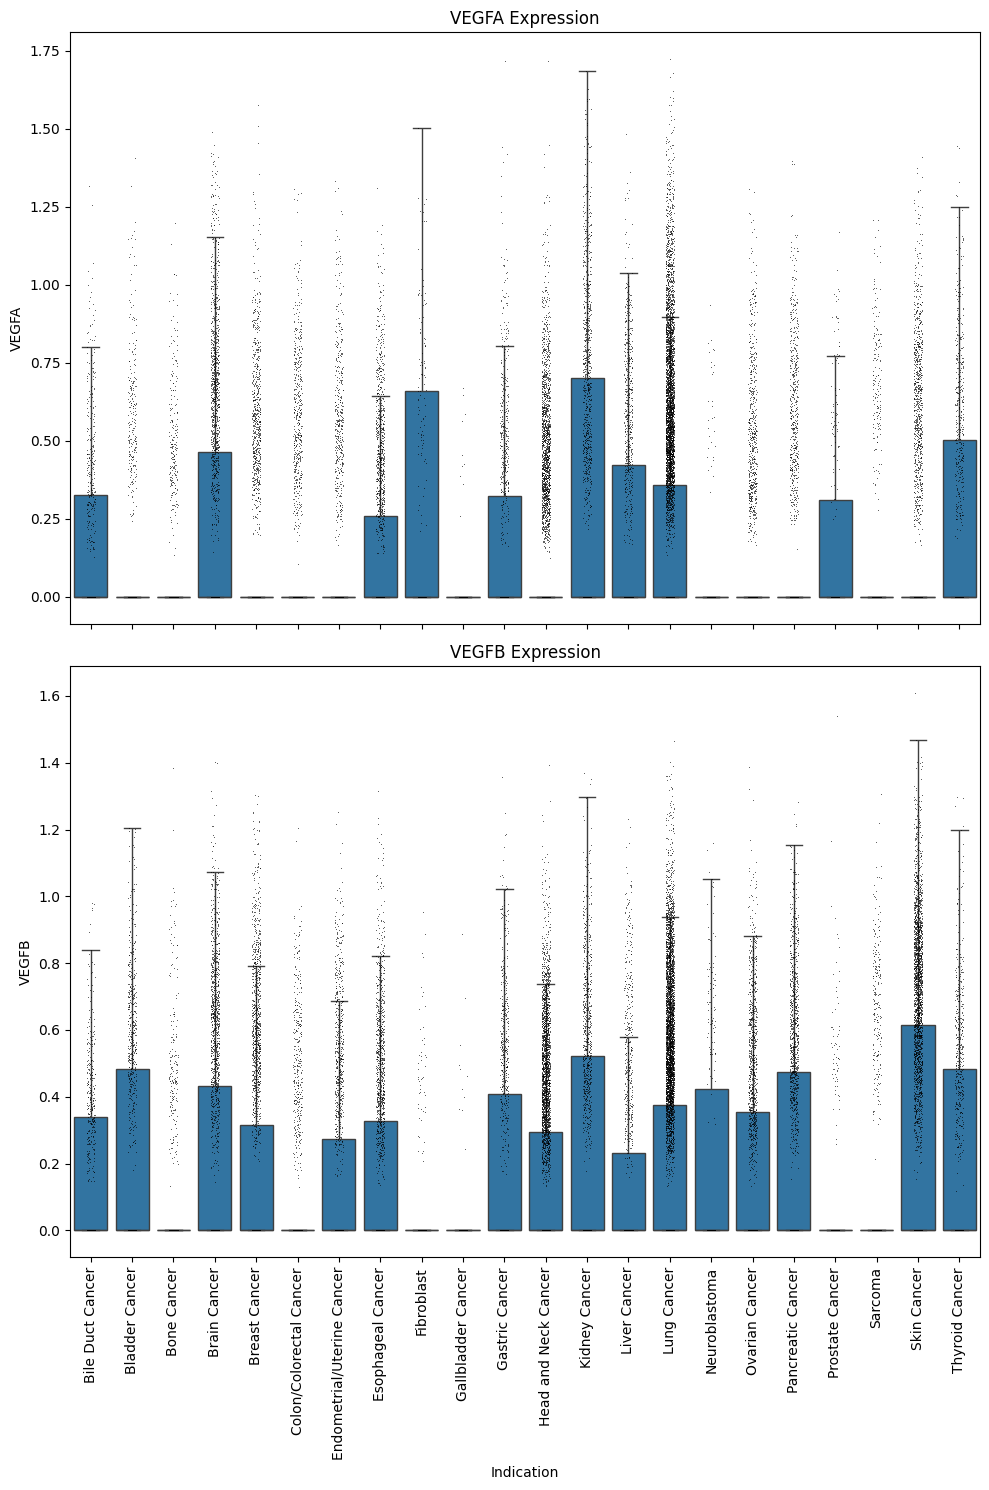

In [7]:
# Create the dataframe with gene expression
df = sc.get.obs_df(adata, keys=['VEGFA', 'VEGFB', 'VEGFC'], layer='log2_counts')
df['Indication'] = adata.obs['Indication']

# Create a figure with 3 subplots (one for each gene)
fig, axes = plt.subplots(2, 1, figsize=(10, 15))

# Plot for VEGFA
sns.boxplot(data=df, x='Indication', y='VEGFA', showfliers=False, ax=axes[0])
sns.stripplot(data=df, x='Indication', y='VEGFA', color='black', size=0.5, jitter=True, ax=axes[0])
axes[0].set_title("VEGFA Expression")
axes[0].set_xlabel('')  # Hide x-axis label
axes[0].set_xticklabels([])  # Hide x-axis ticks

# Plot for VEGFB
sns.boxplot(data=df, x='Indication', y='VEGFB', showfliers=False, ax=axes[1])
sns.stripplot(data=df, x='Indication', y='VEGFB', color='black', size=0.5, jitter=True, ax=axes[1])
axes[1].set_title("VEGFB Expression")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)  # Show x-axis labels only for the bottom plot


# Adjust layout
plt.tight_layout()
plt.show()